✅ ZIP extracted
📁 Dataset root: EMOTIONS_DATA\emotions
📂 Classes: ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
🖼 Using image: EMOTIONS_DATA\emotions\anger\S010_004_00000017.png


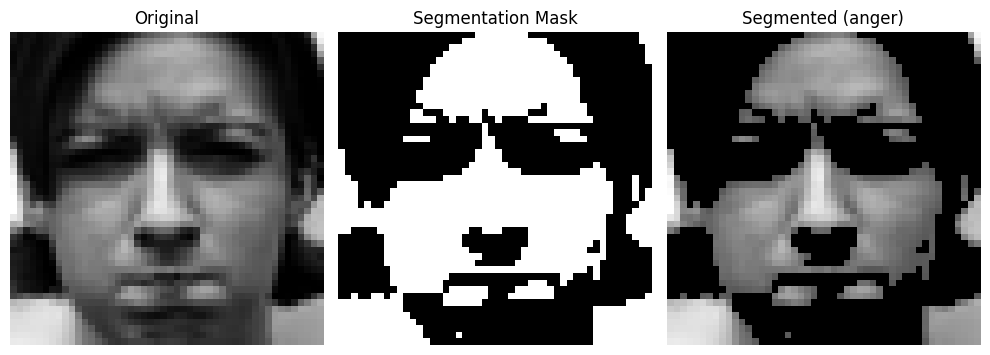

In [9]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

zip_path = "EMOTIONS.zip"
extract_path = "EMOTIONS_DATA"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("✅ ZIP extracted")

root = extract_path
while len(os.listdir(root)) == 1 and os.path.isdir(os.path.join(root, os.listdir(root)[0])):
    root = os.path.join(root, os.listdir(root)[0])

print("📁 Dataset root:", root)
print("📂 Classes:", os.listdir(root))

image_path = None
image_label = None

for label in os.listdir(root):
    label_path = os.path.join(root, label)
    if not os.path.isdir(label_path):
        continue

    for f in os.listdir(label_path):
        if f.lower().endswith((".png", ".jpg", ".jpeg")):
            image_path = os.path.join(label_path, f)
            image_label = label
            break
    if image_path:
        break

if image_path is None:
    raise Exception("❌ No valid image found in ZIP")

print("🖼 Using image:", image_path)

image = cv2.imread(image_path)
if image is None:
    raise Exception("❌ OpenCV failed to read image")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

segmented = cv2.bitwise_and(image, image, mask=mask)

plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.title("Segmentation Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title(f"Segmented ({image_label})")
plt.axis("off")

plt.tight_layout()
plt.show()


✅ Dataset features prepared


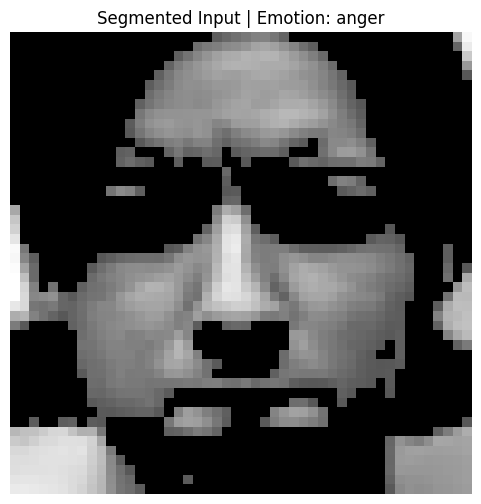

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

dataset_root = root 

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))
    edges = cv2.Canny(gray, 50, 150)
    return np.mean(gray), np.mean(edges)

features = []

for emotion in os.listdir(dataset_root):
    emo_path = os.path.join(dataset_root, emotion)
    if not os.path.isdir(emo_path):
        continue

    for f in os.listdir(emo_path):
        if f.lower().endswith((".png", ".jpg", ".jpeg")):
            img = cv2.imread(os.path.join(emo_path, f))
            if img is None:
                continue
            features.append((extract_features(img), emotion))
            break  

print("✅ Dataset features prepared")

input_path = "S010_004_00000017.png"
input_img = cv2.imread(input_path)

if input_img is None:
    raise Exception("❌ Input image not found")

gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

segmented = cv2.bitwise_and(input_img, input_img, mask=mask)

input_feat = extract_features(input_img)

best_emotion = None
best_score = float("inf")

for feat, emotion in features:
    score = abs(input_feat[0] - feat[0]) + abs(input_feat[1] - feat[1])
    if score < best_score:
        best_score = score
        best_emotion = emotion

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title(f"Segmented Input | Emotion: {best_emotion}")
plt.axis("off")
plt.show()


✅ Dataset features prepared


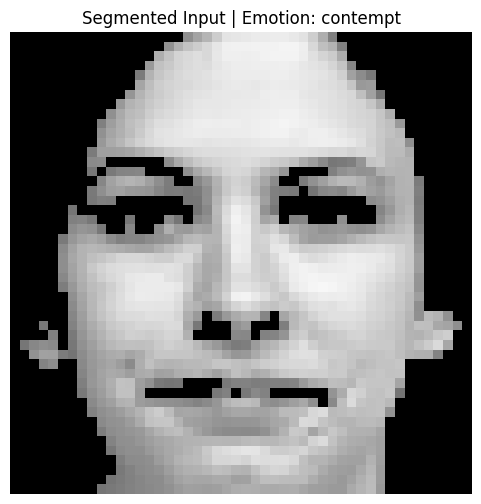

In [3]:

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

dataset_root = root

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))
    edges = cv2.Canny(gray, 50, 150)
    return np.mean(gray), np.mean(edges)

features = []

for emotion in os.listdir(dataset_root):
    emo_path = os.path.join(dataset_root, emotion)
    if not os.path.isdir(emo_path):
        continue

    for f in os.listdir(emo_path):
        if f.lower().endswith((".png", ".jpg", ".jpeg")):
            img = cv2.imread(os.path.join(emo_path, f))
            if img is None:
                continue
            features.append((extract_features(img), emotion))
            break 

print("✅ Dataset features prepared")

input_path = "S138_008_00000007.png"
input_img = cv2.imread(input_path)

if input_img is None:
    raise Exception("❌ Input image not found")

gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

segmented = cv2.bitwise_and(input_img, input_img, mask=mask)

input_feat = extract_features(input_img)

best_emotion = None
best_score = float("inf")

for feat, emotion in features:
    score = abs(input_feat[0] - feat[0]) + abs(input_feat[1] - feat[1])
    if score < best_score:
        best_score = score
        best_emotion = emotion

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title(f"Segmented Input | Emotion: {best_emotion}")
plt.axis("off")
plt.show()


✅ Dataset features prepared


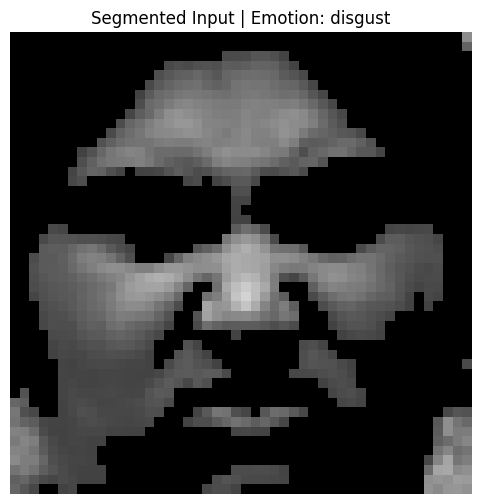

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

dataset_root = root 

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))
    edges = cv2.Canny(gray, 50, 150)
    return np.mean(gray), np.mean(edges)

features = []

for emotion in os.listdir(dataset_root):
    emo_path = os.path.join(dataset_root, emotion)
    if not os.path.isdir(emo_path):
        continue

    for f in os.listdir(emo_path):
        if f.lower().endswith((".png", ".jpg", ".jpeg")):
            img = cv2.imread(os.path.join(emo_path, f))
            if img is None:
                continue
            features.append((extract_features(img), emotion))
            break  

print("✅ Dataset features prepared")

input_path = "S005_001_00000009.png"
input_img = cv2.imread(input_path)

if input_img is None:
    raise Exception("❌ Input image not found")

gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

segmented = cv2.bitwise_and(input_img, input_img, mask=mask)

input_feat = extract_features(input_img)

best_emotion = None
best_score = float("inf")

for feat, emotion in features:
    score = abs(input_feat[0] - feat[0]) + abs(input_feat[1] - feat[1])
    if score < best_score:
        best_score = score
        best_emotion = emotion

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title(f"Segmented Input | Emotion: {best_emotion}")
plt.axis("off")
plt.show()


✅ Dataset features prepared


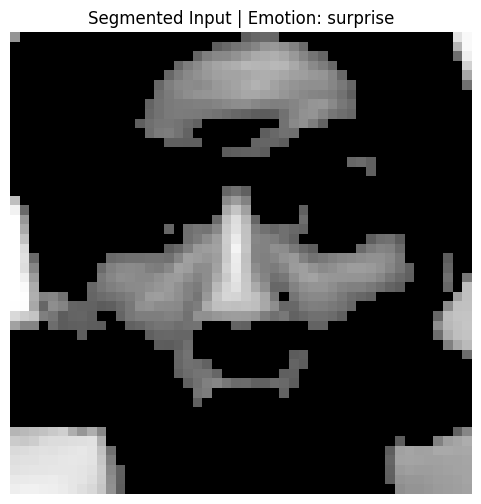

In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

dataset_root = root 

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))
    edges = cv2.Canny(gray, 50, 150)
    return np.mean(gray), np.mean(edges)

features = []

for emotion in os.listdir(dataset_root):
    emo_path = os.path.join(dataset_root, emotion)
    if not os.path.isdir(emo_path):
        continue

    for f in os.listdir(emo_path):
        if f.lower().endswith((".png", ".jpg", ".jpeg")):
            img = cv2.imread(os.path.join(emo_path, f))
            if img is None:
                continue
            features.append((extract_features(img), emotion))
            break  

print("✅ Dataset features prepared")

input_path = "S010_002_00000012.png"
input_img = cv2.imread(input_path)

if input_img is None:
    raise Exception("❌ Input image not found")

gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

segmented = cv2.bitwise_and(input_img, input_img, mask=mask)

input_feat = extract_features(input_img)

best_emotion = None
best_score = float("inf")

for feat, emotion in features:
    score = abs(input_feat[0] - feat[0]) + abs(input_feat[1] - feat[1])
    if score < best_score:
        best_score = score
        best_emotion = emotion

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title(f"Segmented Input | Emotion: {best_emotion}")
plt.axis("off")
plt.show()


✅ Dataset features prepared


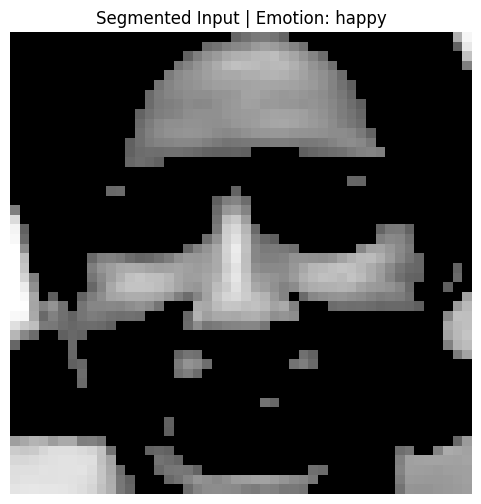

In [7]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

dataset_root = root 

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))
    edges = cv2.Canny(gray, 50, 150)
    return np.mean(gray), np.mean(edges)

features = []

for emotion in os.listdir(dataset_root):
    emo_path = os.path.join(dataset_root, emotion)
    if not os.path.isdir(emo_path):
        continue

    for f in os.listdir(emo_path):
        if f.lower().endswith((".png", ".jpg", ".jpeg")):
            img = cv2.imread(os.path.join(emo_path, f))
            if img is None:
                continue
            features.append((extract_features(img), emotion))
            break  

print("✅ Dataset features prepared")

input_path = "S010_006_00000013.png"
input_img = cv2.imread(input_path)

if input_img is None:
    raise Exception("❌ Input image not found")

gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

segmented = cv2.bitwise_and(input_img, input_img, mask=mask)

input_feat = extract_features(input_img)

best_emotion = None
best_score = float("inf")

for feat, emotion in features:
    score = abs(input_feat[0] - feat[0]) + abs(input_feat[1] - feat[1])
    if score < best_score:
        best_score = score
        best_emotion = emotion

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title(f"Segmented Input | Emotion: {best_emotion}")
plt.axis("off")
plt.show()


✅ Dataset features prepared


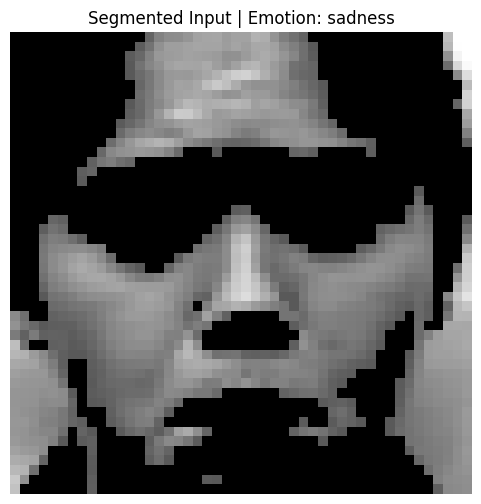

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

dataset_root = root 

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))
    edges = cv2.Canny(gray, 50, 150)
    return np.mean(gray), np.mean(edges)

features = []

for emotion in os.listdir(dataset_root):
    emo_path = os.path.join(dataset_root, emotion)
    if not os.path.isdir(emo_path):
        continue

    for f in os.listdir(emo_path):
        if f.lower().endswith((".png", ".jpg", ".jpeg")):
            img = cv2.imread(os.path.join(emo_path, f))
            if img is None:
                continue
            features.append((extract_features(img), emotion))
            break  

print("✅ Dataset features prepared")

input_path = "S011_002_00000020.png"
input_img = cv2.imread(input_path)

if input_img is None:
    raise Exception("❌ Input image not found")

gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

segmented = cv2.bitwise_and(input_img, input_img, mask=mask)

input_feat = extract_features(input_img)

best_emotion = None
best_score = float("inf")

for feat, emotion in features:
    score = abs(input_feat[0] - feat[0]) + abs(input_feat[1] - feat[1])
    if score < best_score:
        best_score = score
        best_emotion = emotion

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title(f"Segmented Input | Emotion: {best_emotion}")
plt.axis("off")
plt.show()


✅ Dataset features prepared


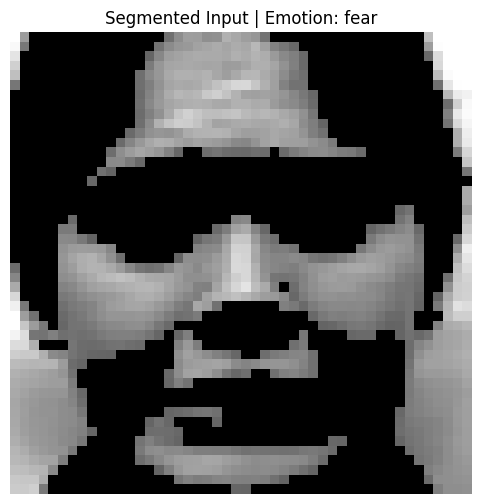

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

dataset_root = root 

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))
    edges = cv2.Canny(gray, 50, 150)
    return np.mean(gray), np.mean(edges)

features = []

for emotion in os.listdir(dataset_root):
    emo_path = os.path.join(dataset_root, emotion)
    if not os.path.isdir(emo_path):
        continue

    for f in os.listdir(emo_path):
        if f.lower().endswith((".png", ".jpg", ".jpeg")):
            img = cv2.imread(os.path.join(emo_path, f))
            if img is None:
                continue
            features.append((extract_features(img), emotion))
            break  

print("✅ Dataset features prepared")

input_path = "S011_003_00000012.png"
input_img = cv2.imread(input_path)

if input_img is None:
    raise Exception("❌ Input image not found")

gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

segmented = cv2.bitwise_and(input_img, input_img, mask=mask)

input_feat = extract_features(input_img)

best_emotion = None
best_score = float("inf")

for feat, emotion in features:
    score = abs(input_feat[0] - feat[0]) + abs(input_feat[1] - feat[1])
    if score < best_score:
        best_score = score
        best_emotion = emotion

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title(f"Segmented Input | Emotion: {best_emotion}")
plt.axis("off")
plt.show()
